BP Time Series1

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from pylab import rcParams
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
print(pd.__version__)

2.2.3


In [24]:
# 读取数据集
raw_dataset = pd.read_csv('Trina, 10.5kW, mono-Si, Dual, 2009_23-24_data_5min.csv')
raw_dataset = raw_dataset[raw_dataset[(raw_dataset['timestamp']=='2023-11-02 00:00:00')].index.to_list()[0]:raw_dataset[(raw_dataset['timestamp']=='2023-12-07 01:25:00')].index.to_list()[0]]
raw_dataset = raw_dataset.reset_index(drop=True)
timestamp=raw_dataset['timestamp']
# 提取标签列
labels = raw_dataset.pop('power')

# 保留特定的列
columns_to_keep = ['rainfall', 'temperature', 'solar_radiation']
UV_data = raw_dataset[columns_to_keep]

# 将目标变量赋值给UV_target
UV_target = labels
print(UV_target.max())

4.7934002876282


In [25]:
timestamp

0       2023-11-02 00:00:00
1       2023-11-02 00:05:00
2       2023-11-02 00:10:00
3       2023-11-02 00:15:00
4       2023-11-02 00:20:00
               ...         
9995    2023-12-07 01:00:00
9996    2023-12-07 01:05:00
9997    2023-12-07 01:10:00
9998    2023-12-07 01:15:00
9999    2023-12-07 01:20:00
Name: timestamp, Length: 10000, dtype: object

In [26]:
timestamp[-2000:]

8000    2023-11-30 02:40:00
8001    2023-11-30 02:45:00
8002    2023-11-30 02:50:00
8003    2023-11-30 02:55:00
8004    2023-11-30 03:00:00
               ...         
9995    2023-12-07 01:00:00
9996    2023-12-07 01:05:00
9997    2023-12-07 01:10:00
9998    2023-12-07 01:15:00
9999    2023-12-07 01:20:00
Name: timestamp, Length: 2000, dtype: object

In [27]:
UV_data.info()
UV_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rainfall         9994 non-null   float64
 1   temperature      9994 non-null   float64
 2   solar_radiation  9994 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: power
Non-Null Count  Dtype  
--------------  -----  
9993 non-null   float64
dtypes: float64(1)
memory usage: 78.2 KB


In [28]:
UV_data=UV_data.interpolate(method='linear')
UV_target=UV_target.interpolate(method='linear')

In [29]:
UV_data.info()
UV_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rainfall         10000 non-null  float64
 1   temperature      10000 non-null  float64
 2   solar_radiation  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: power
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [30]:
print(UV_data)

      rainfall  temperature  solar_radiation
0          0.0    23.016729         1.198639
1          0.0    23.009212         1.400028
2          0.0    22.940315         1.403546
3          0.0    22.888359         1.279168
4          0.0    22.820093         1.210640
...        ...          ...              ...
9995       0.0    22.334486         1.509167
9996       0.0    22.444263         0.872923
9997       0.0    22.195475         1.564722
9998       0.0    22.167774         0.797242
9999       0.0    22.466747         0.897938

[10000 rows x 3 columns]


In [31]:
# 标准化数据
scaler = StandardScaler()
UV_data = scaler.fit_transform(UV_data)
UV_target_Standard = UV_target
UV_target_Standard = scaler.fit_transform(UV_target_Standard.values.reshape(-1, 1)).flatten()

# 划分训练集和测试集，从训练集中分离出验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(UV_data, UV_target_Standard, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=RANDOM_SEED)

# 打印标准化后的数据集信息
print("训练集形状:", X_train.shape)
print("验证集形状:", X_valid.shape)
print("测试集形状:", X_test.shape)



训练集形状: (6400, 3)
验证集形状: (1600, 3)
测试集形状: (2000, 3)


In [32]:
UV_target_Standard

array([-0.73424627, -0.73424627, -0.73424627, ..., -0.73424627,
       -0.73424627, -0.73424627])

In [33]:
y_train

array([-0.73424627, -0.73424627, -0.73424627, ...,  1.21212429,
       -0.73424627, -0.25946593])

In [34]:
X_train

array([[-0.36844562, -0.37189952, -0.72581918],
       [-0.21929846, -1.40440884, -0.72120727],
       [-0.36844562, -0.1711992 , -0.7209366 ],
       ...,
       [-0.36844562,  0.05693954,  1.16333245],
       [-0.36844562, -0.20188932, -0.72441385],
       [-0.36844562, -0.60383929, -0.23361512]])

In [35]:
X_test

array([[-0.36844562, -0.84799884, -0.72314979],
       [ 1.57046722, -0.65903342,  0.44930522],
       [-0.36844562, -0.87329262, -0.7246582 ],
       ...,
       [-0.36844562, -0.14150148, -0.39131429],
       [-0.36844562, -0.40381627, -0.72012348],
       [-0.36844562,  0.29606804,  0.12192014]])

In [36]:
from tensorflow import keras

# 设置优化器和学习率
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# 创建模型
model = keras.models.Sequential([
	keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
	keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 添加早停回调
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

# 评估模型
mse_test = model.evaluate(X_test, y_test)

# 打印测试集上的均方误差
print(f"Test MSE: {mse_test}")

Epoch 1/40


d:\Anaconda\envs\DS5\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1101 - val_loss: 0.0060
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0056
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0051
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 9/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 10/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0045
Epoch 11/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 12/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

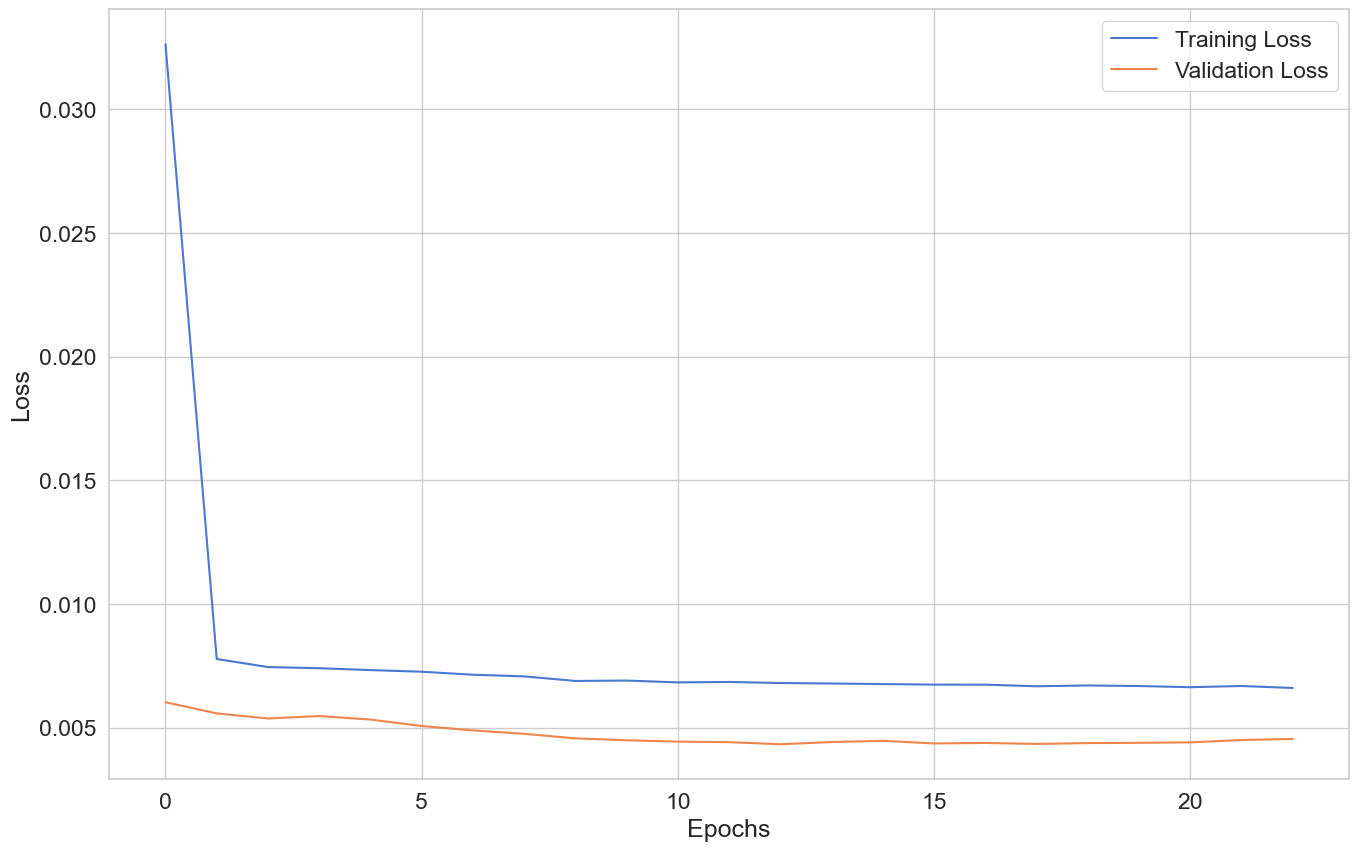

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [37]:
# 绘制训练和验证损失曲线
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

In [38]:
y_pred

array([[-0.7281332 ],
       [ 0.5401598 ],
       [-0.72954804],
       ...,
       [-0.37786537],
       [-0.7240047 ],
       [ 0.15410376]], dtype=float32)

In [39]:
y_test

array([-0.73424627,  0.56901963, -0.73424627, ..., -0.3528945 ,
       -0.73424627,  0.15449678])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
4.0225496
-0.038053326
1.2547749
4.7934002876282
-0.008500000461936
0.9614054045944791


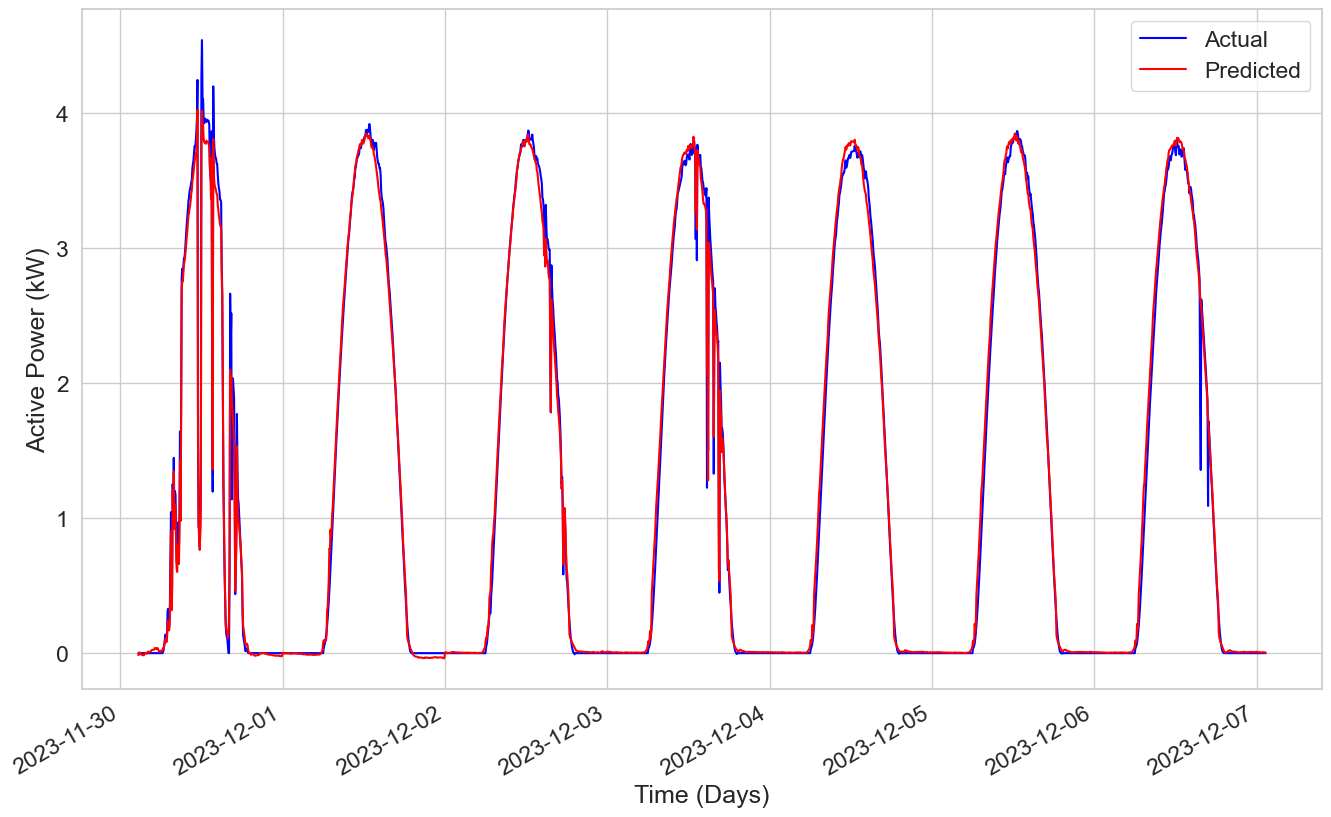

In [40]:
#绘制对照图
# 设置随机种子
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# 配置绘图参数
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

# 提取时间戳列
time_data = pd.to_datetime(raw_dataset[-2000:]['timestamp'])


# 预测
y_pred = model.predict(UV_data[-2000:])

# 反标准化
y_pred = scaler.inverse_transform(y_pred).flatten()
#UV_target = scaler.inverse_transform(UV_target.reshape(-1, 1)).flatten()

print(y_pred.max())
print(y_pred.min())
print(y_pred.mean())

print(UV_target.max())
print(UV_target.min())
print(UV_target.mean())
# 绘制图表
fig = plt.figure(dpi=100)
plt.plot(time_data, UV_target[-2000:], c='blue', label='Actual')
plt.plot(time_data, y_pred[-2000:], c='red', label='Predicted')
plt.xlabel('Time (Days)')
plt.ylabel('Active Power (kW)')
plt.legend()

# 设置x轴标签格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))  # 每5天显示一个标签

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(UV_target[-2000:],y_pred[-2000:])

np.float64(0.010684464688767147)

In [42]:
y_pred[-2000:]

array([-0.01313346, -0.01308041,  0.00501246, ...,  0.00625856,
        0.00391395,  0.0044275 ], dtype=float32)

In [43]:
result=pd.DataFrame(y_pred[-1990:],columns=['power_bp_time'],index=time_data[-1990:])
result

,power_bp_time
timestamp,
2023-11-30 03:30:00,-0.016334
2023-11-30 03:35:00,-0.003434
2023-11-30 03:40:00,-0.003498
2023-11-30 03:45:00,-0.002827
2023-11-30 03:50:00,-0.002208
...,...
2023-12-07 01:00:00,0.006187
2023-12-07 01:05:00,0.004336
2023-12-07 01:10:00,0.006259


In [44]:
result.to_csv('bp_time.csv')